# Datenanalyse Kompensiert und Nicht Kompensiert

## 1. DeepMotion Nicht Kompensiert

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [76]:
df_deepM_03 = pd.read_csv('../Data/KeypointsBereinigtNichtKompensiert.csv', sep=',', encoding='utf-8')
df_deepM_03.head(5)

,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
0,0,1,/Users/salomekoller/Library/CloudStorage/OneDr...,0.0000,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,7.371407,7.371387,9.394707,9.399187,-6.115406,-6.115967,-5.740273,-5.740273,47.437397,47.436827
1,0,2,/Users/salomekoller/Library/CloudStorage/OneDr...,-3.3216,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-2.696713,-3.498616,-29.445363,-13.956810,-63.243623,-64.332943,-5.740273,-5.740273,-14.759285,-16.102833
2,0,3,/Users/salomekoller/Library/CloudStorage/OneDr...,1.6550,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-8.997166,-10.653107,-45.717673,-27.773403,-97.982793,-99.005583,-5.740273,-5.740273,-52.912333,-53.810943
3,0,4,/Users/salomekoller/Library/CloudStorage/OneDr...,3.9860,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.049377,-11.663836,-44.307243,-28.706163,-97.977963,-98.740323,-5.740273,-5.740273,-52.726213,-53.393883
4,0,5,/Users/salomekoller/Library/CloudStorage/OneDr...,5.4320,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.798463,-12.359276,-44.008033,-29.568633,-98.200573,-98.692723,-5.740273,-5.740273,-52.941793,-53.249863


### 1.2 Analyse Form

In [77]:
print('Dimension:', df_deepM_03.shape)
print('Number of rows:', df_deepM_03.shape[0])
print('Number of columns:', df_deepM_03.shape[1])

Dimension: (2495, 102)
Number of rows: 2495
Number of columns: 102


### 1.2 Splitting Frames

In [78]:
# Variablen initiieren
frame_count = 0
frames_until_reset = []

# Iterieren über Dataframe, um Frames mit '1' zu finden
for index, row in df_deepM_03.iterrows():
    frame_count += 1

    if row["frame"] == 1 and frame_count > 1:
        frames_until_reset.append(frame_count -1)

if frame_count > 0:
    frames_until_reset.append(frame_count)

print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [200, 405, 610, 816, 1023, 1228, 1434, 1558, 1740, 1931, 2123, 2298, 2495]


In [79]:
# Einzelne Bewegungen werden in verschiedene Dataframes gepackt
dfs = []
start = 0
for end in frames_until_reset:
    dfs.append(df_deepM_03.iloc[start:end])
    start = end

print("Number of splits:", len(dfs))

Number of splits: 13


### 1.3 Bewegungsanalyse anhand rechter Handbewegung (Nicht Kompensiert)

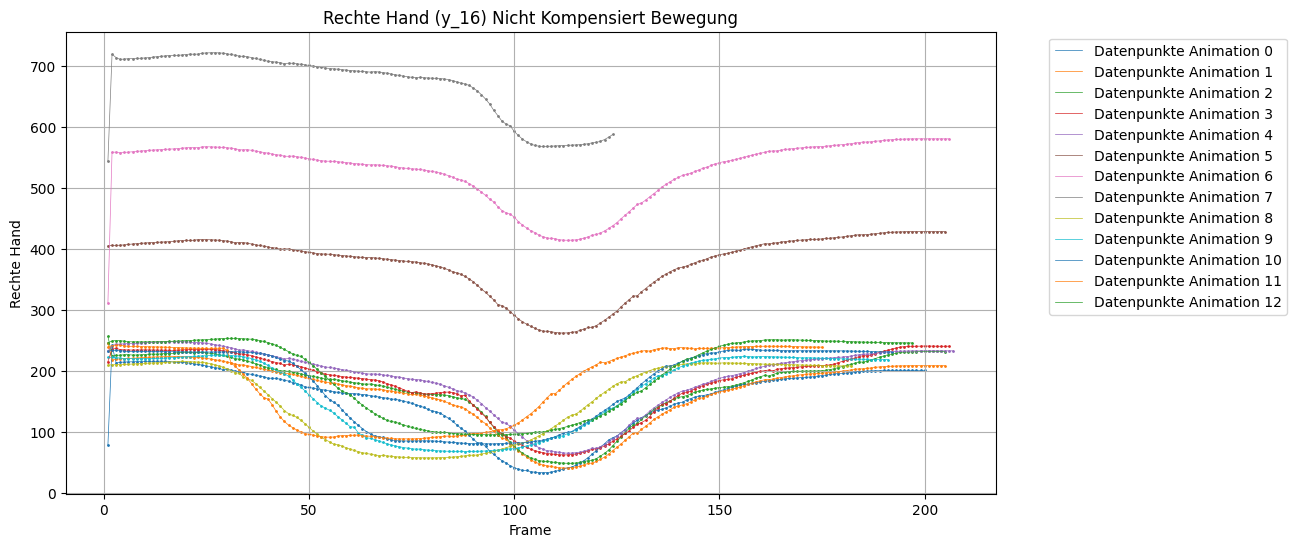

In [80]:
plt.figure(figsize=(12, 6))  
for i, df in enumerate(dfs):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("Rechte Hand (y_16) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 1.3.1 Berechnung des Mean

In [81]:
means03 = []
mean_values_03 = df_deepM_03[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means03.append(mean_values_03)
    
mean_values_03.head(5)

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
frame,,,,,,,,,,,,,,,,,,,,,
1,79.493292,72.779392,-228.744809,-998.361846,-304.775762,-26.98443,-998.361846,-304.775762,-26.98443,-998.361846,...,-26.98443,-998.361846,-304.775762,-26.98443,149.440385,854.327931,-254.116310,68.670823,855.122777,-245.317675
2,80.842746,99.829900,-211.074476,-998.361846,-304.775762,-26.98443,-998.361846,-304.775762,-26.98443,-998.361846,...,-26.98443,-998.361846,-304.775762,-26.98443,163.447615,851.653008,-258.559565,82.730146,852.526469,-250.147171
3,82.510746,101.002331,-210.113453,-998.361846,-304.775762,-26.98443,-998.361846,-304.775762,-26.98443,-998.361846,...,-26.98443,-998.361846,-304.775762,-26.98443,163.719231,852.666931,-262.638270,83.002077,853.170623,-254.117010
4,84.052592,100.255823,-211.267363,-998.361846,-304.775762,-26.98443,-998.361846,-304.775762,-26.98443,-998.361846,...,-26.98443,-998.361846,-304.775762,-26.98443,163.184077,852.866085,-263.303793,82.441015,853.160469,-255.047349
5,85.027269,99.980685,-212.000914,-998.361846,-304.775762,-26.98443,-998.361846,-304.775762,-26.98443,-998.361846,...,-26.98443,-998.361846,-304.775762,-26.98443,163.622923,852.672315,-263.814763,82.899346,852.872623,-255.592536


#### 1.3.2 Bewegungsmuster mit Mean

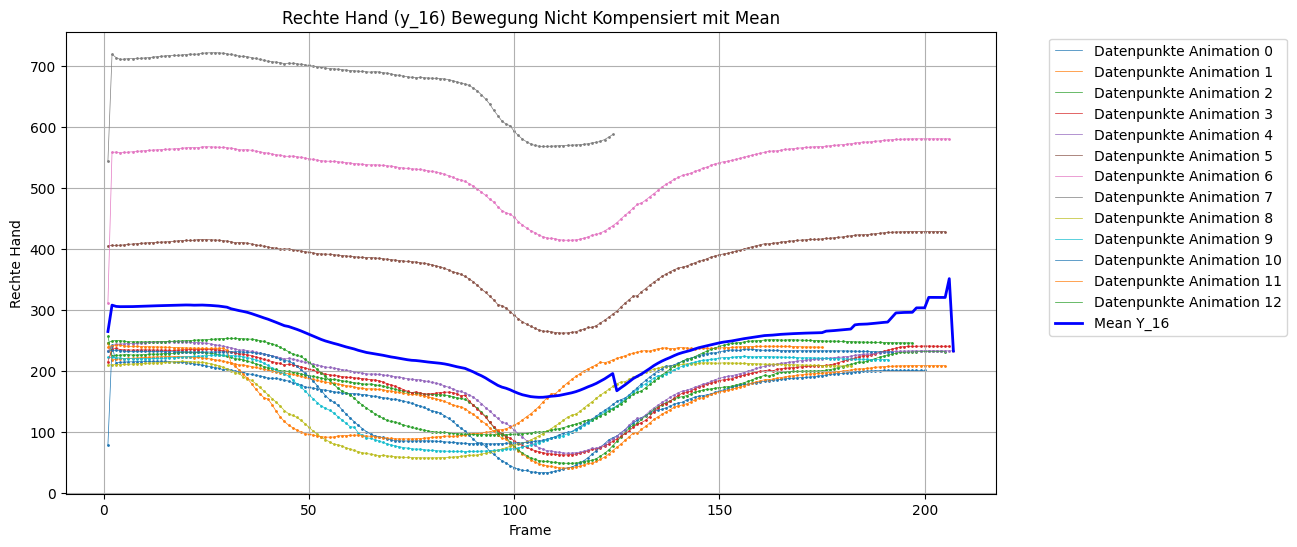

In [82]:
plt.figure(figsize=(12, 6))

for i, df in enumerate(dfs):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.plot(mean_values_03.index, mean_values_03["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')
plt.title("Rechte Hand (y_16) Bewegung Nicht Kompensiert mit Mean")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### 1.4 Linke Handbewegung Nicht Kompensiert

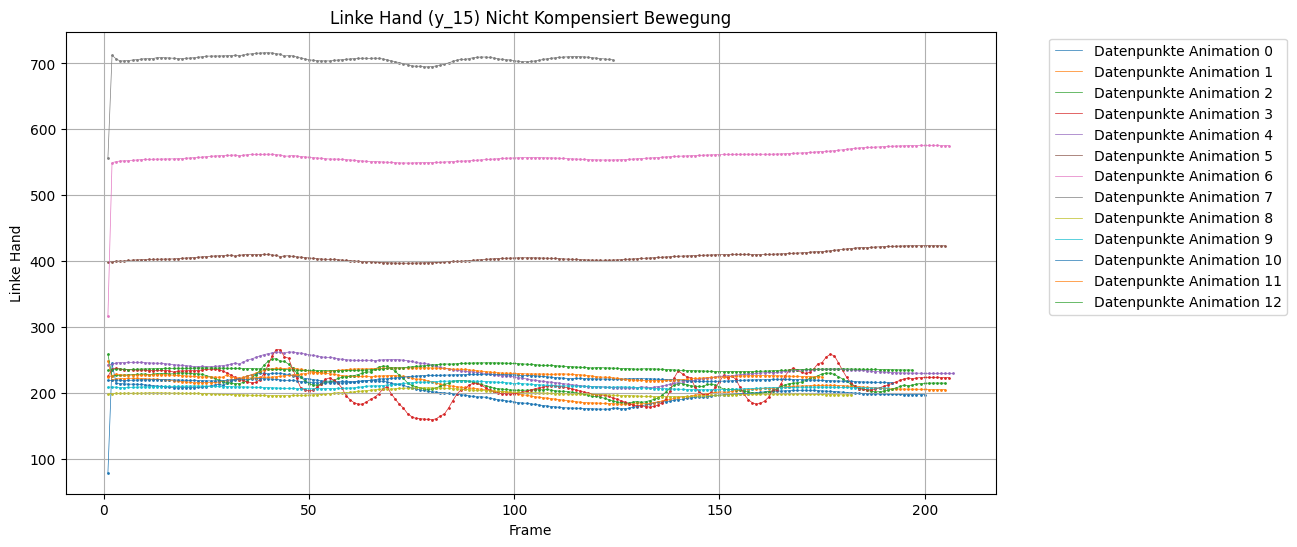

In [83]:
plt.figure(figsize=(12, 6)) 
for i, df in enumerate(dfs):
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("Linke Hand (y_15) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### 1.5 Linker Ellbogen Nicht Kompensiert

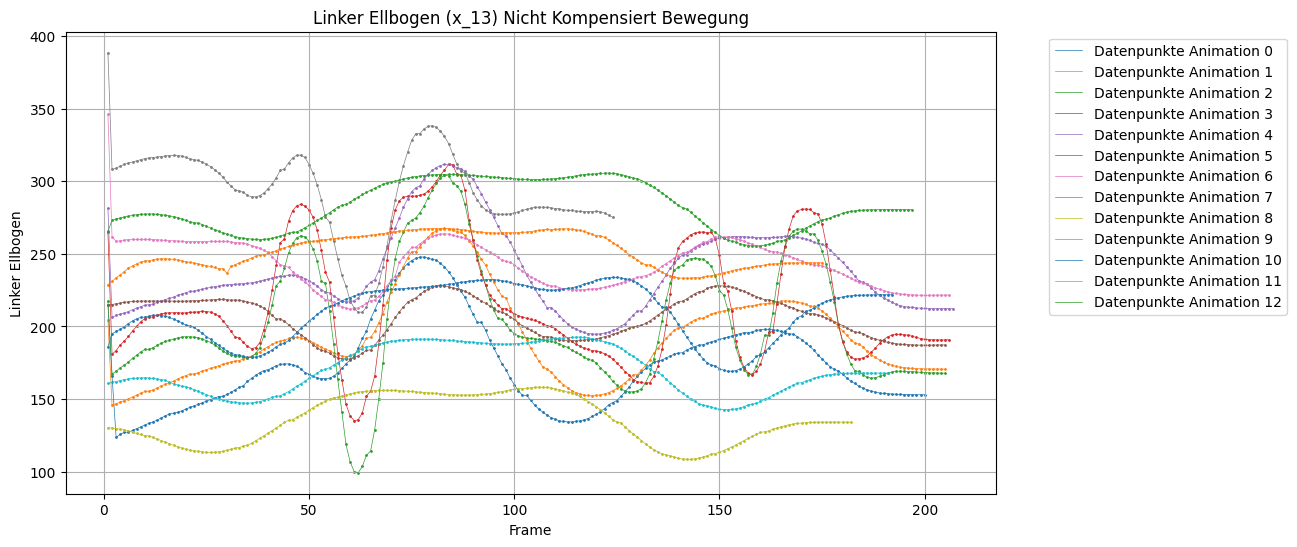

In [84]:
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):

    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')


plt.title("Linker Ellbogen (x_13) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## 2. DeepMotion Kompensiert

In [85]:
df_deepM01 = pd.read_csv('../Data/KeypointsBereinigtKompensiert.csv', sep=',', encoding='utf-8')
df_deepM01.head(5)

,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
0,1,1,/Users/salomekoller/Library/CloudStorage/OneDr...,0.0000,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,7.371407,7.371387,9.394707,9.399187,-6.115406,-6.115967,-5.740273,-5.740273,47.437397,47.436827
1,1,2,/Users/salomekoller/Library/CloudStorage/OneDr...,-3.3216,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-2.696713,-3.498616,-29.445363,-13.956810,-63.243623,-64.332943,-5.740273,-5.740273,-14.759285,-16.102833
2,1,3,/Users/salomekoller/Library/CloudStorage/OneDr...,1.6550,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-8.997166,-10.653107,-45.717673,-27.773403,-97.982793,-99.005583,-5.740273,-5.740273,-52.912333,-53.810943
3,1,4,/Users/salomekoller/Library/CloudStorage/OneDr...,3.9860,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.049377,-11.663836,-44.307243,-28.706163,-97.977963,-98.740323,-5.740273,-5.740273,-52.726213,-53.393883
4,1,5,/Users/salomekoller/Library/CloudStorage/OneDr...,5.4320,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.798463,-12.359276,-44.008033,-29.568633,-98.200573,-98.692723,-5.740273,-5.740273,-52.941793,-53.249863


### 2.1 Analyse Form

In [86]:
print('Dimension:', df_deepM01.shape)
print('Number of rows:', df_deepM01.shape[0])
print('Number of columns:', df_deepM01.shape[1])

Dimension: (3273, 102)
Number of rows: 3273
Number of columns: 102


### 2.2 Splitting Frames

In [87]:
# Variablen initiieren
frame_count = 0
frames_until_reset = []

# Iterieren über Dataframe, um Frames mit '1' zu finden
for index, row in df_deepM01.iterrows():
    frame_count += 1

    if row["frame"] == 1 and frame_count > 1:
        frames_until_reset.append(frame_count -1)

if frame_count > 0:
    frames_until_reset.append(frame_count)

print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [200, 405, 610, 816, 1023, 1228, 1434, 1558, 1895, 2234, 2577, 2924, 3273]


In [88]:
# Einzelne Bewegungen werden in verschiedene Dataframes gepackt
dfsKomp01 = []
start = 0
for end in frames_until_reset:
    dfsKomp01.append(df_deepM01.iloc[start:end])
    start = end

print("Number of splits:", len(dfsKomp01))

Number of splits: 13


### 2.3 Bewegungsanalyse anhand rechte Handbewegung (Kompensiert)

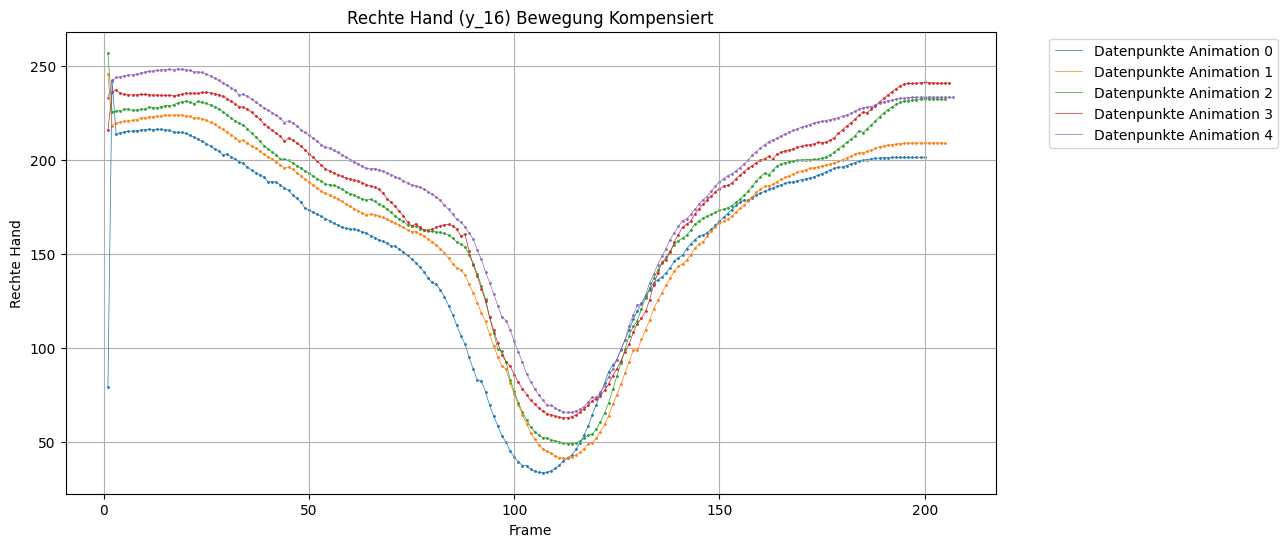

In [89]:
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfsKomp01[:5]):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("Rechte Hand (y_16) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

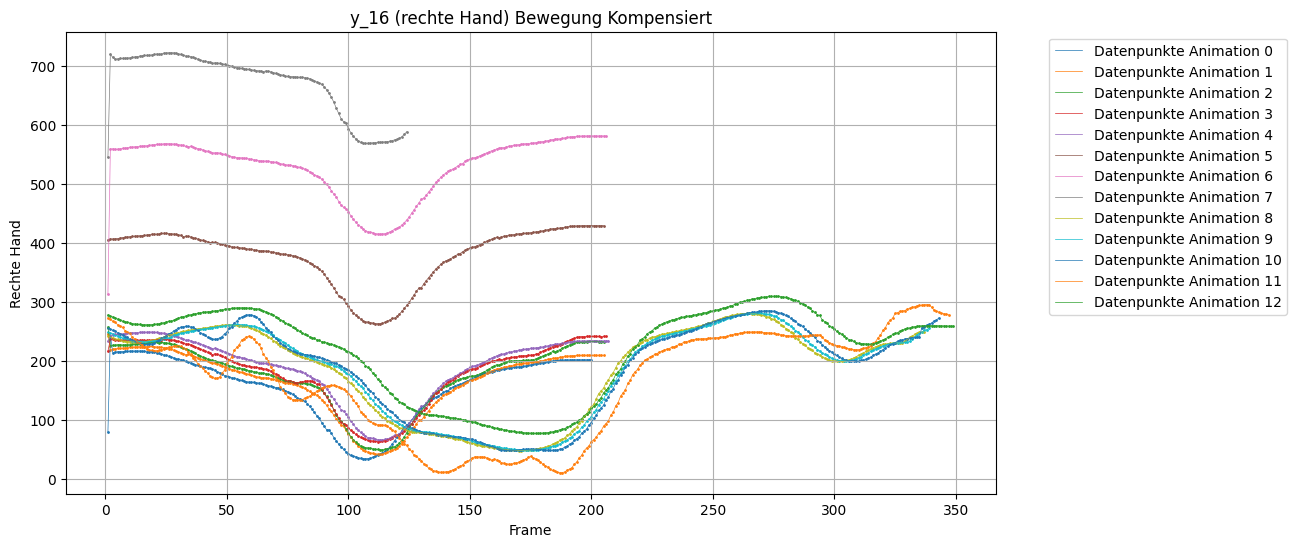

In [90]:
plt.figure(figsize=(12, 6)) 
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2.3.1 Berechnung des Mean

In [91]:
means01 = []
mean_values_01 = df_deepM01[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means01.append(mean_values_01) 
mean_values_01.head(5)

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
frame,,,,,,,,,,,,,,,,,,,,,
1,23.146215,69.069492,-202.250882,-1018.37,-302.761877,-24.10581,-1018.37,-302.761877,-24.10581,-1018.37,...,-24.10581,-1018.37,-302.761877,-24.10581,80.028715,841.234477,-188.612794,-39.429969,845.322662,-189.331286
2,25.201508,95.652638,-182.959528,-1018.37,-302.761877,-24.10581,-1018.37,-302.761877,-24.10581,-1018.37,...,-24.10581,-1018.37,-302.761877,-24.10581,93.877131,838.121923,-193.405393,-25.268138,842.048662,-194.329566
3,27.431054,96.784785,-180.365567,-1018.37,-302.761877,-24.10581,-1018.37,-302.761877,-24.10581,-1018.37,...,-24.10581,-1018.37,-302.761877,-24.10581,94.036800,839.229285,-197.663445,-24.763977,842.553969,-198.393835
4,29.857354,96.380038,-179.746803,-1018.37,-302.761877,-24.10581,-1018.37,-302.761877,-24.10581,-1018.37,...,-24.10581,-1018.37,-302.761877,-24.10581,93.313208,839.543685,-198.300937,-25.480231,842.688200,-199.034175
5,31.584008,96.531500,-178.454013,-1018.37,-302.761877,-24.10581,-1018.37,-302.761877,-24.10581,-1018.37,...,-24.10581,-1018.37,-302.761877,-24.10581,93.903815,839.588585,-198.727588,-24.933223,842.655969,-199.368078


#### 2.3.2 Bewegungsmuster mit Mean

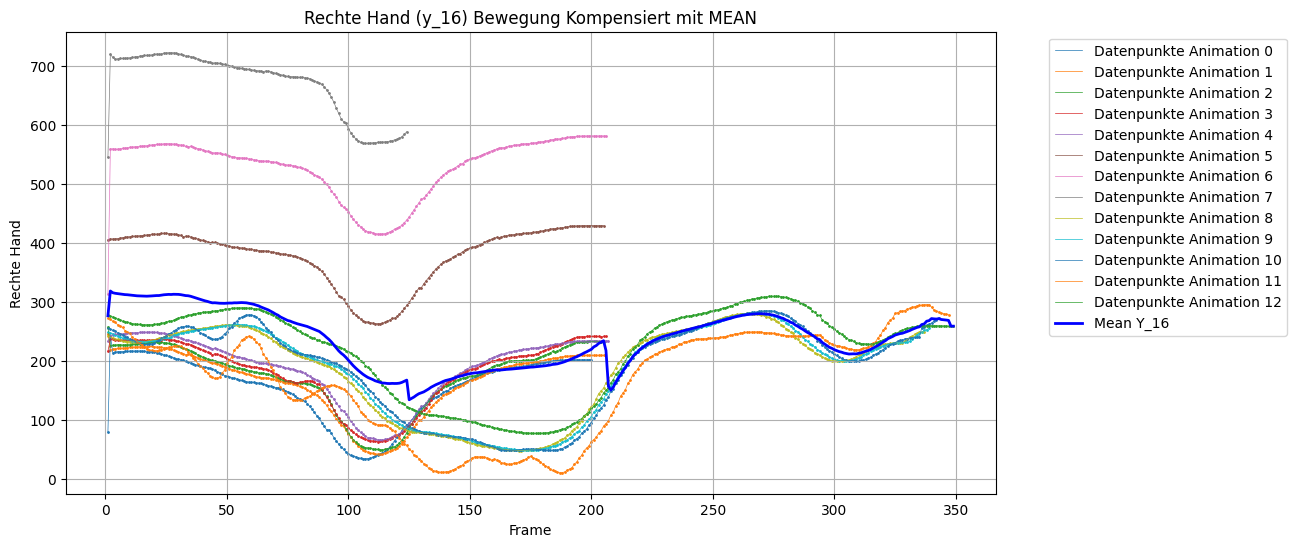

In [92]:
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("Rechte Hand (y_16) Bewegung Kompensiert mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.4 Linke Handbewegung Kompensiert

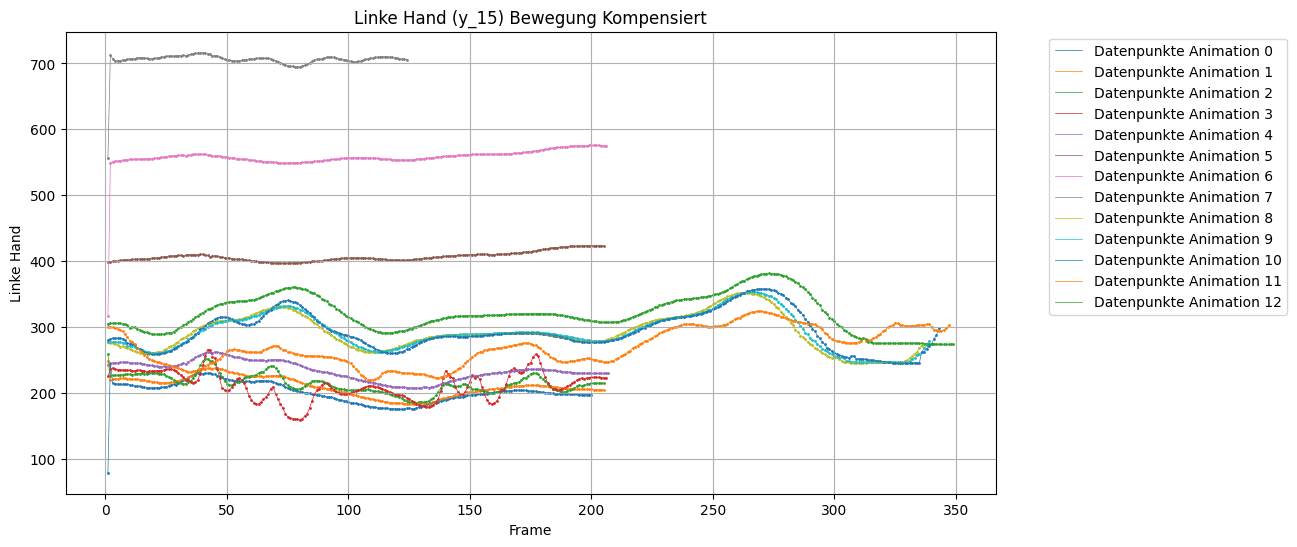

In [93]:
plt.figure(figsize=(12, 6)) 
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("Linke Hand (y_15) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.5 Linker Ellbogen Kompensiert

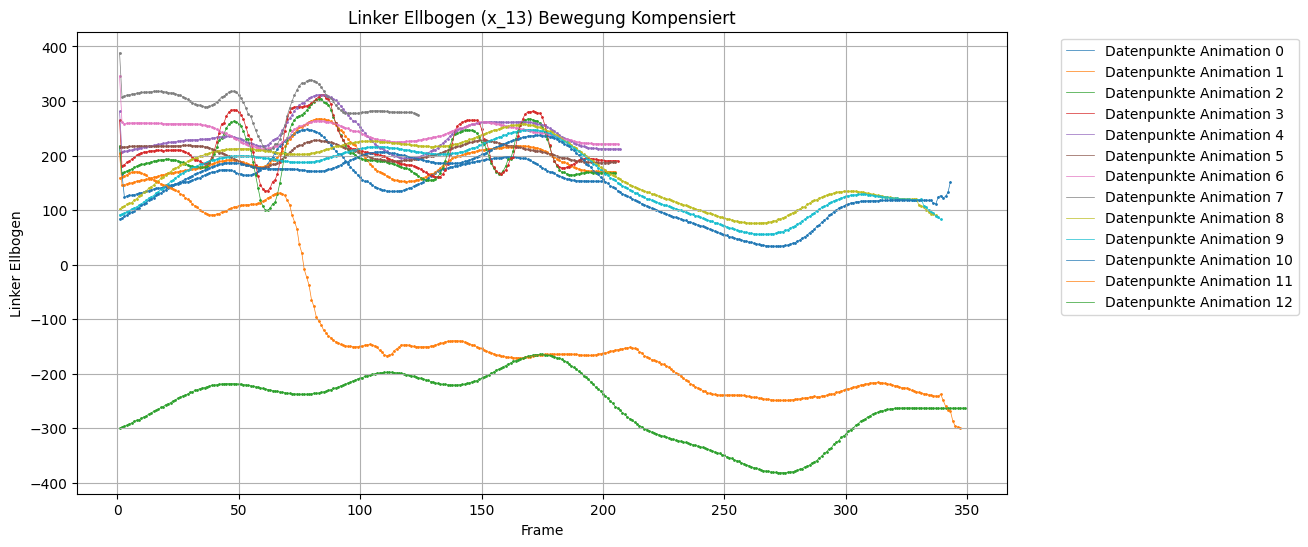

In [94]:
plt.figure(figsize=(12, 6))  
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', s=1)
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Datenpunkte Animation {i}')

plt.title("Linker Ellbogen (x_13) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Berechnung Euclidean Distances

## 1. Analyse der Kompensierten und nicht Komptensierten Mean Werte

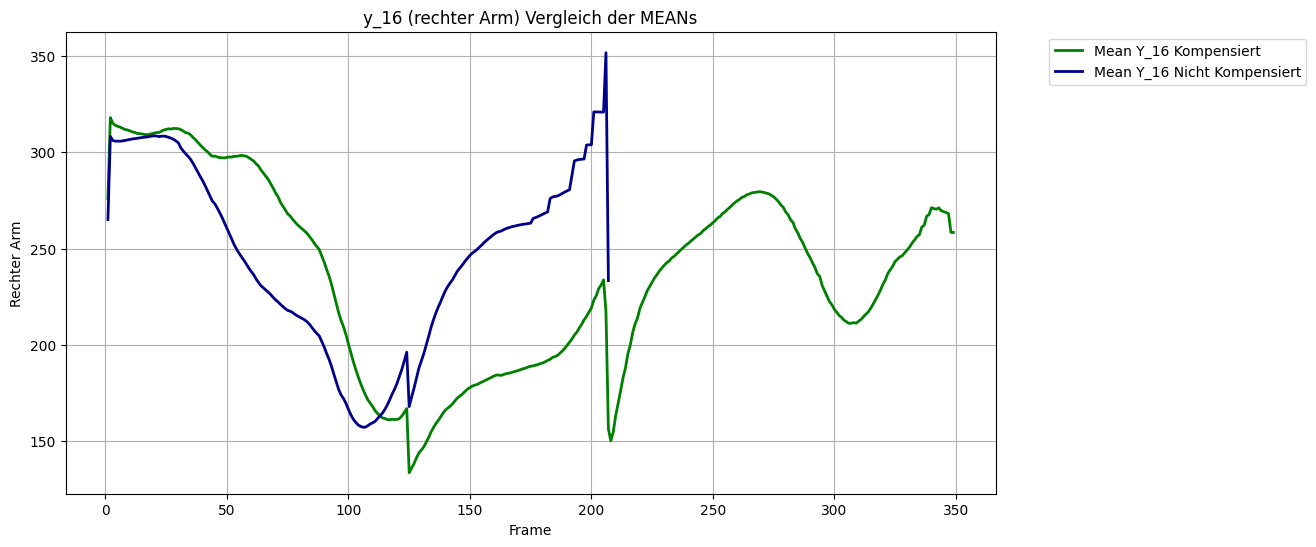

In [95]:
plt.figure(figsize=(12, 6))

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='green', linestyle='-', linewidth=2, label='Mean Y_16 Kompensiert')
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=2, label='Mean Y_16 Nicht Kompensiert')

plt.title("y_16 (rechter Arm) Vergleich der MEANs")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2. Vergleich Werte Kompensiert und Nicht Kompensiert anhand Euclidean Distances

In [96]:
# Definition von Kolonnen
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Kalkulieren von euclidean Distance
euclidean_distances_03 = {}

common_frames = mean_values_03.index.intersection(mean_values_01.index)

for frame in common_frames:
    euclidean_distances_03[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_03.loc[frame, col])
        point_2 = (frame, mean_values_01.loc[frame, col])
        euclidean_distance_03 = distance.euclidean(point_1, point_2)
        euclidean_distances_03[frame].append(euclidean_distance_03)

euclidean_df_03 = pd.DataFrame.from_dict(euclidean_distances_03, orient='index', columns=columns[1:])
euclidean_df_03.head(5)

,x_0,y_0,z_0,x_11,y_11,z_11,x_12,y_12,z_12,x_13,...,z_27,x_28,y_28,z_28,x_31,y_31,z_31,x_32,y_32,z_32
1,56.347077,3.709900,26.493928,61.694015,0.853769,31.509481,61.518769,2.812477,30.101374,64.344615,...,63.135909,104.625854,7.051408,54.270514,69.411669,13.093454,65.503517,108.100792,9.800115,55.986389
2,55.641238,4.177262,28.114948,61.163600,1.457569,32.761196,60.991808,3.470746,31.484992,65.024954,...,62.901840,104.530977,7.753708,54.128556,69.570485,13.531085,65.154172,107.998285,10.477808,55.817605
3,55.079692,4.217546,29.747885,60.736092,1.626208,34.037398,60.571785,3.686838,32.897257,64.611300,...,62.832064,104.345577,7.981038,54.121204,69.682431,13.437646,64.974825,107.766054,10.616654,55.723174
4,54.195238,3.875785,31.520561,60.052254,1.431562,35.427136,59.887723,3.564262,34.409048,64.056131,...,62.950448,104.414962,7.871669,54.438603,69.870869,13.322400,65.002857,107.921246,10.472269,56.013174
5,53.443262,3.449185,33.546902,59.460269,1.182000,36.979316,59.304600,3.374023,36.122608,63.458154,...,63.133985,104.288562,7.662746,54.706187,69.719108,13.083731,65.087175,107.832569,10.216654,56.224458


#### 2.1 Vergleich Rechte Hand

TypeError: Legend.__init__() got an unexpected keyword argument 'bloc'

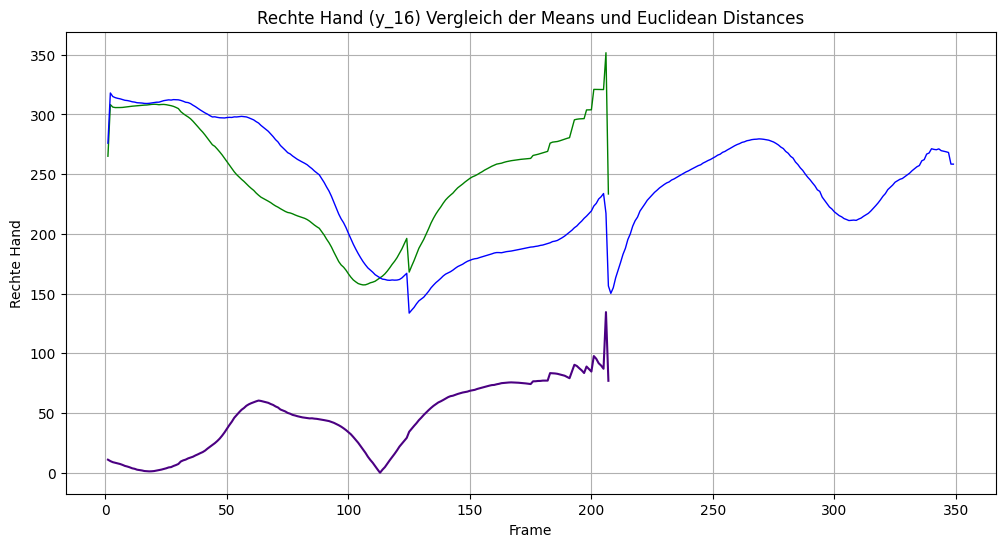

In [97]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("Rechte Hand (y_16) Vergleich der Means und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bloc='best')
plt.show()

#### 2.2 Vergleich Linke Hand

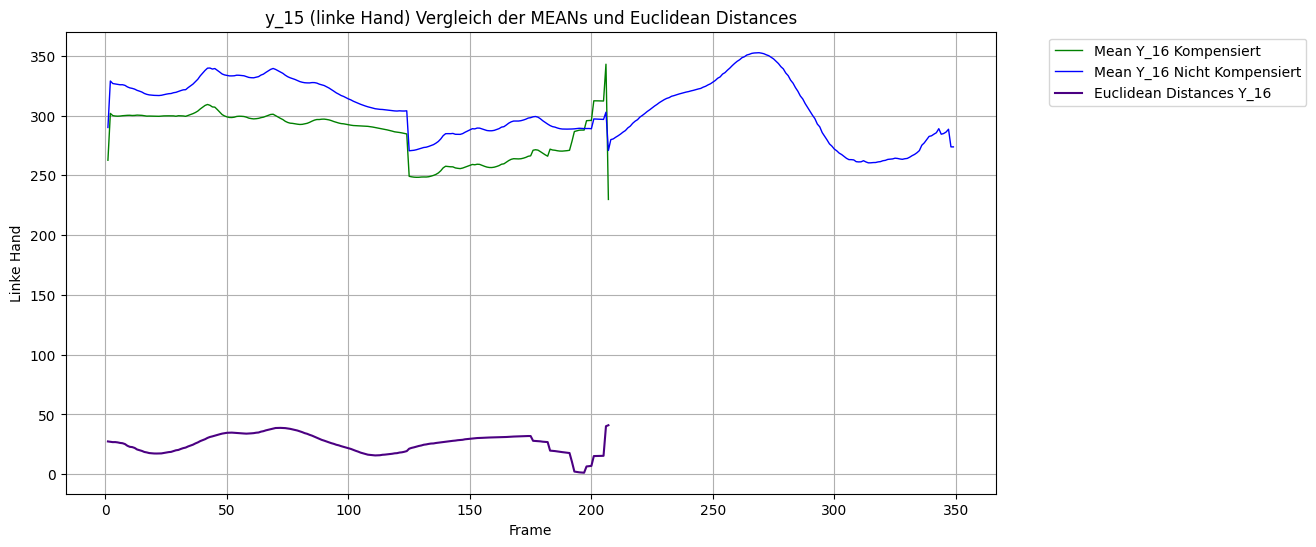

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_15"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_15"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_15"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("Linke Hand (y_15) Vergleich der Means und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### 2.3 Vergleich linker Ellbogen

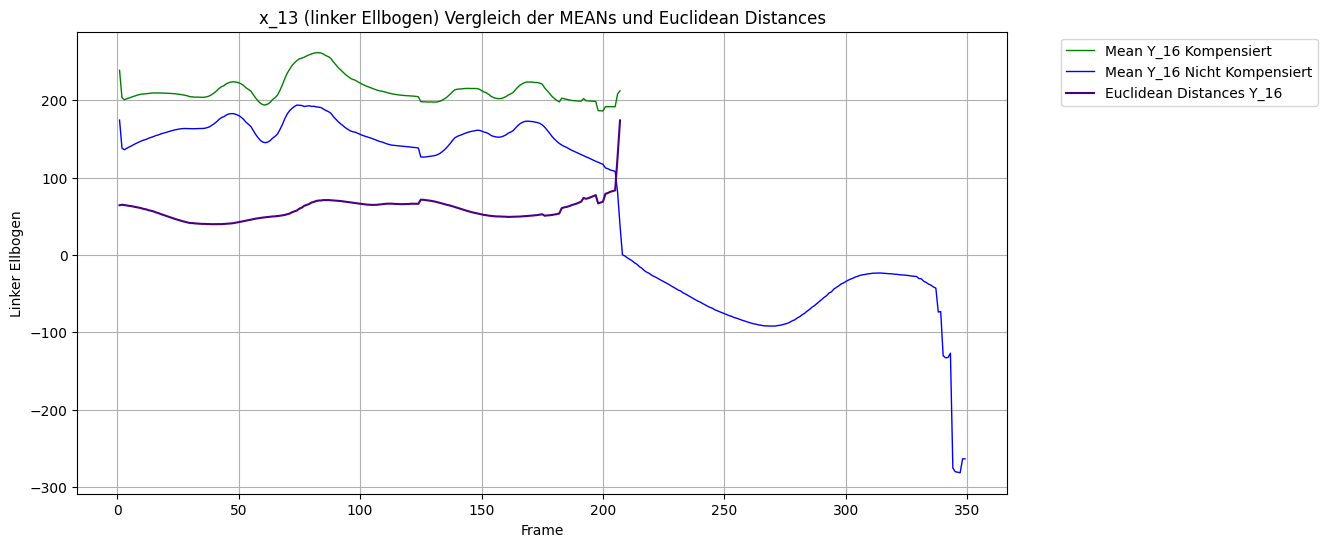

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["x_13"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["x_13"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["x_13"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("Linker Ellbogen (x_13) Vergleich der Means und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3. Analyse Euclidean Distances

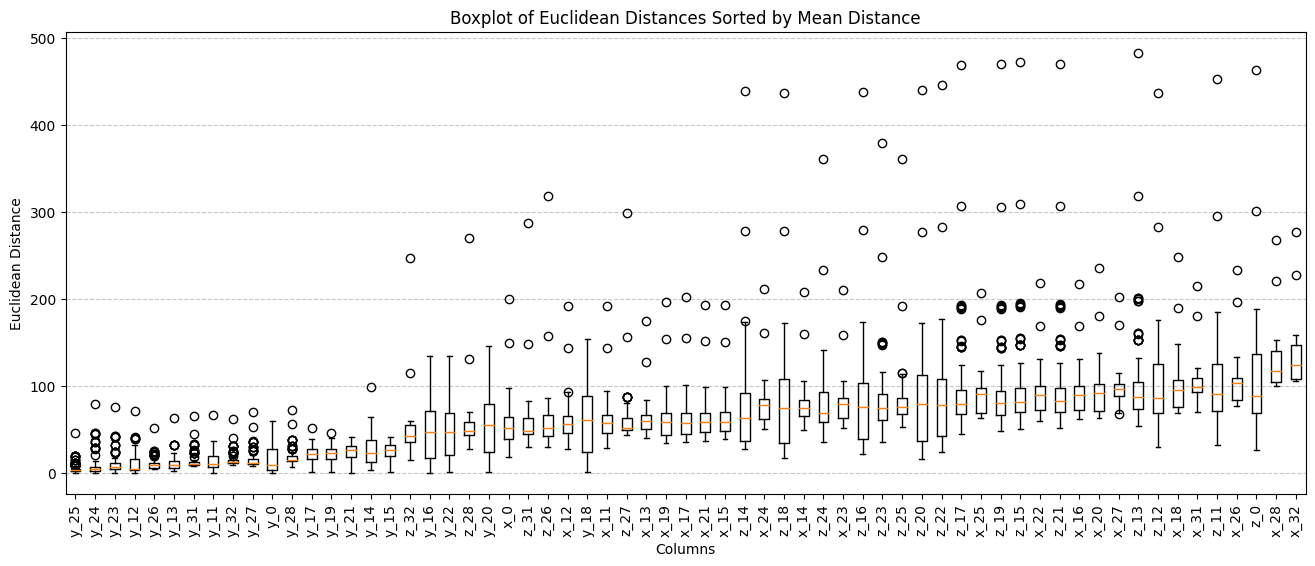

In [ ]:
mean_distances = euclidean_df_03.mean()
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.1 Analyse Euclidean Distances ohne Z Werte

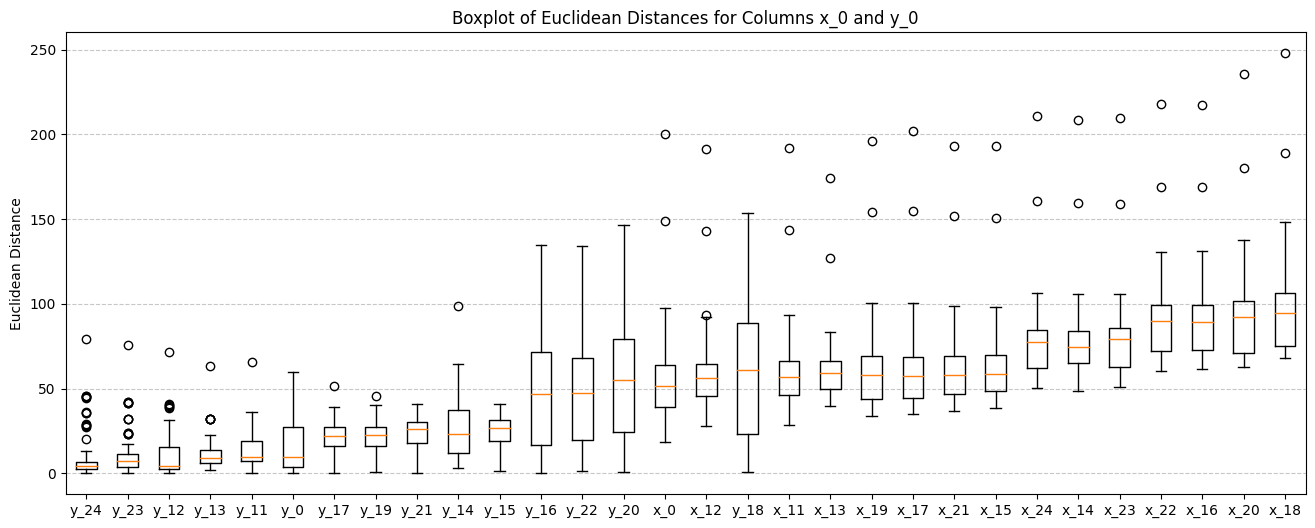

In [ ]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances for Columns x_0 and y_0')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Vergleich ganzer Oberkörper

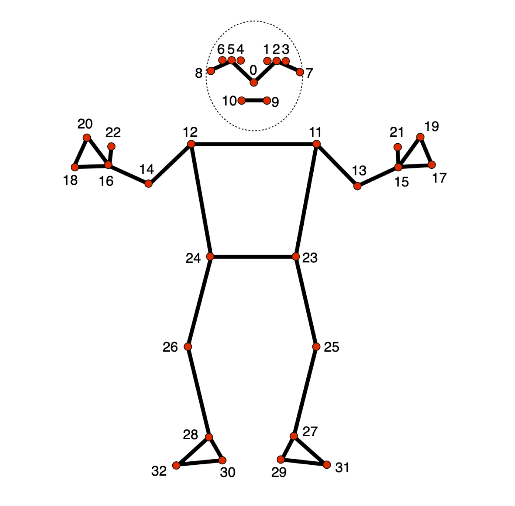

In [ ]:
# Inserting an image
img = plt.imread('Pictures/landmark.png')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

In [ ]:
selected_columns = ['x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
                    'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 
                    'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                    'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 
                    'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                    'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 
                    'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                    'x_24', 'y_24', 'z_24']

difference_in_mean_upper_body_01 = mean_values_01[selected_columns].mean() - mean_values_03[selected_columns].mean()
print(f"Mean Value: {difference_in_mean_upper_body_01}")

Mean Value: x_0    -147.400673
y_0      -4.531935
z_0     178.774507
x_11   -149.795352
y_11    -11.713364
z_11    171.212613
x_12   -149.280201
y_12    -15.069126
z_12    165.919668
x_13   -147.136210
y_13    -16.865248
z_13    170.188276
x_14   -164.884046
y_14    -32.208482
z_14    119.634339
x_15   -139.602184
y_15     21.121775
z_15    162.195464
x_16   -194.758924
y_16     -9.453361
z_16    141.700297
x_17   -132.880172
y_17     15.957865
z_17    158.530291
x_18   -206.325952
y_18     -8.033598
z_18    143.186552
x_19   -133.569279
y_19     17.433462
z_19    158.954701
x_20   -201.656343
y_20     -7.284322
z_20    148.614966
x_21   -138.473776
y_21     20.348651
z_21    163.258594
x_22   -195.118314
y_22     -8.354448
z_22    146.409882
x_23   -163.812389
y_23    -20.549169
z_23    133.983561
x_24   -163.654302
y_24    -24.459143
z_24    127.893144
dtype: float64


In [ ]:
selected_columns_X = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24']

selected_columns_Y = ['y_0', 'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

selected_columns_Z = ['z_0', 'z_11', 'z_12', 'z_13', 
                    'z_14', 'z_15', 'z_16', 'z_17', 
                    'z_18', 'z_19', 'z_20', 'z_21', 
                    'z_22', 'z_23', 'z_24']

difference_in_mean_upper_body_01_X = difference_in_mean_upper_body_01[selected_columns_X]
difference_in_mean_upper_body_01_Y = difference_in_mean_upper_body_01[selected_columns_Y]
difference_in_mean_upper_body_01_Z = difference_in_mean_upper_body_01[selected_columns_Z]

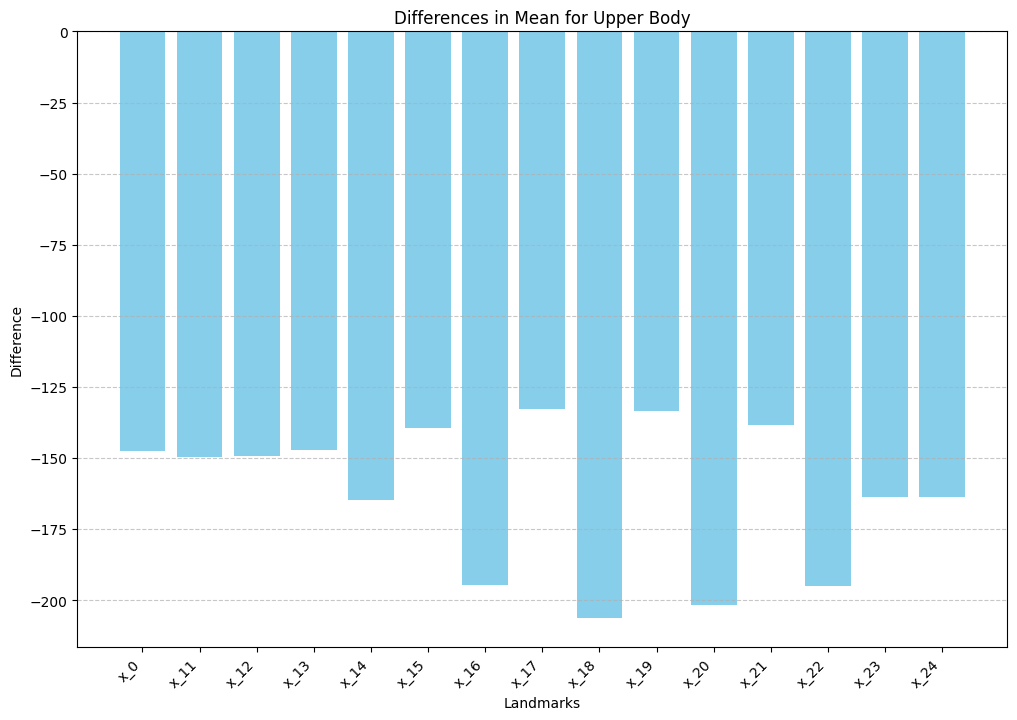

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_X.index, difference_in_mean_upper_body_01_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

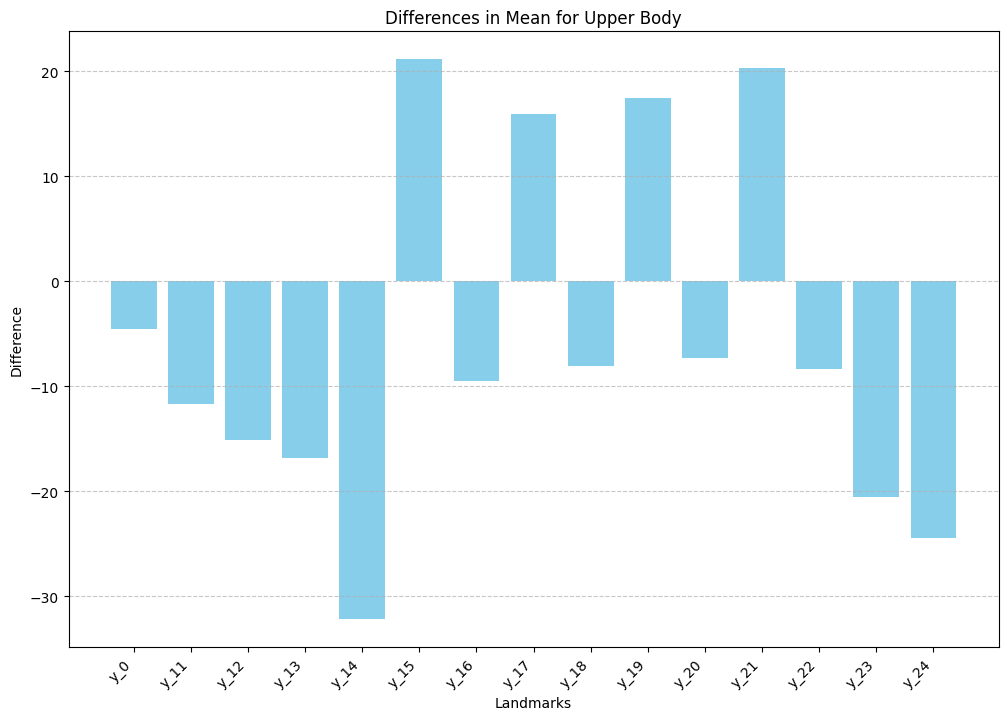

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Y.index, difference_in_mean_upper_body_01_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

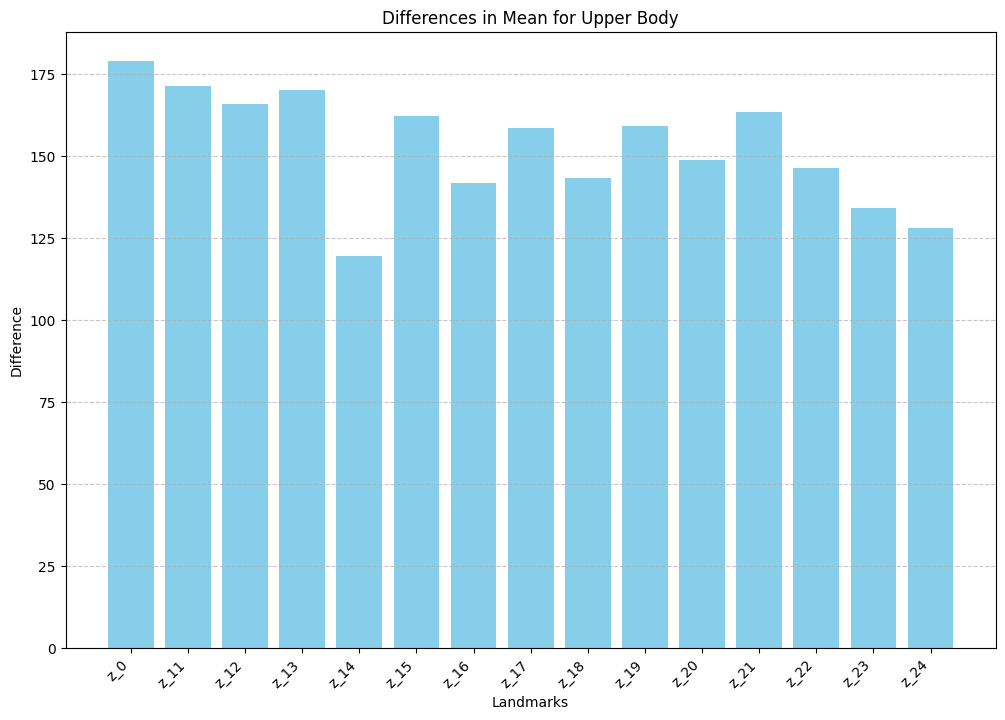

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Z.index, difference_in_mean_upper_body_01_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()